<a href="https://colab.research.google.com/github/JonathanSum/Improve_my_Pytorch_skill/blob/master/02_space_stretching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://imgur.com/wniZTh0.jpg" width=300>

In [0]:
# Load libraries
import torch
import torch.nn as nn
from res.plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [0]:
# Set style (needs to be in a new cell)
set_default()

In [0]:
#see if the gpu is avaible. if so use it, otherwise don't.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

torch.Size([1000])
tensor([[0., 0.],
        [0., 0.],
        [1., 0.],
        [0., 1.]], device='cuda:0')


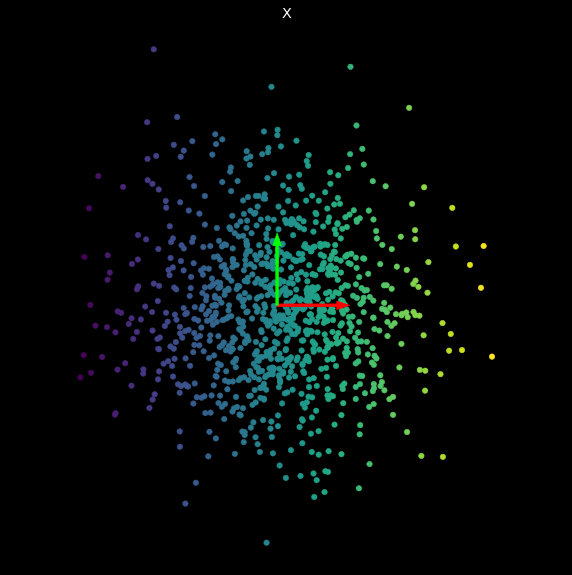

In [42]:
# generate some points in 2-D space
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]    #shape of list size 0
print(colors.shape)
show_scatterplot(X, colors, title='X')
OI = torch.cat((torch.zeros(2, 2), torch.eye(2))).to(device)   #torch.eye is a identity matrix
print(OI)
plot_bases(OI)

# Visualizing Linear Transformations

* Generate a random matrix $W$

$
\begin{equation}
    W = U
  \left[ {\begin{array}{cc}
   s_1 & 0 \\
   0 & s_2 \\
  \end{array} } \right]
  V^\top
\end{equation}
$
* Compute $y = Wx$
* Larger singular values stretch the points
* Smaller singular values push them together
* $U, V$ rotate/reflect

tensor([[0.0000, 0.0000],
        [0.0000, 0.0000],
        [1.9771, 2.0506],
        [0.1423, 1.7561]], device='cuda:0')
tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [-1.0765, -2.7013],
        [-0.9835,  1.2260]], device='cuda:0')
tensor([[0.0000, 0.0000],
        [0.0000, 0.0000],
        [1.3014, 0.0780],
        [0.7982, 0.8022]], device='cuda:0')
tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [-1.2576,  0.7266],
        [ 0.7567, -0.3382]], device='cuda:0')
tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.8461, -0.9127],
        [ 0.0691, -0.8470]], device='cuda:0')
tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [-0.4874, -1.2668],
        [-1.0794,  1.4496]], device='cuda:0')
tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [-0.3782, -0.7219],
        [ 0.0615, -0.8121]], device='cuda:0')
tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [-1.1848, -0.4865],
        [ 1.7151,  0.9

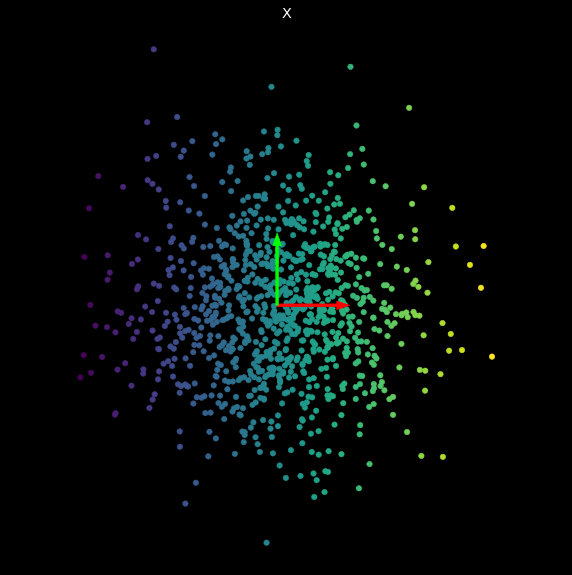

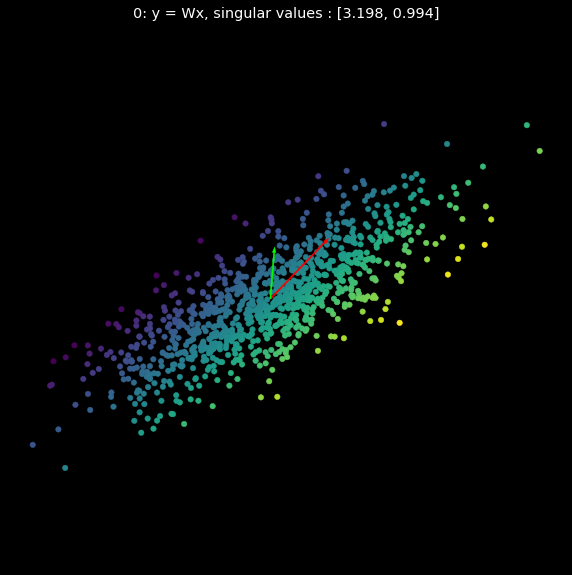

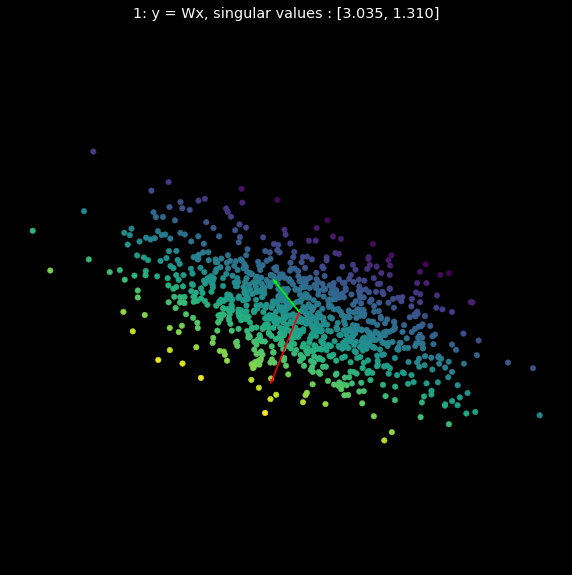

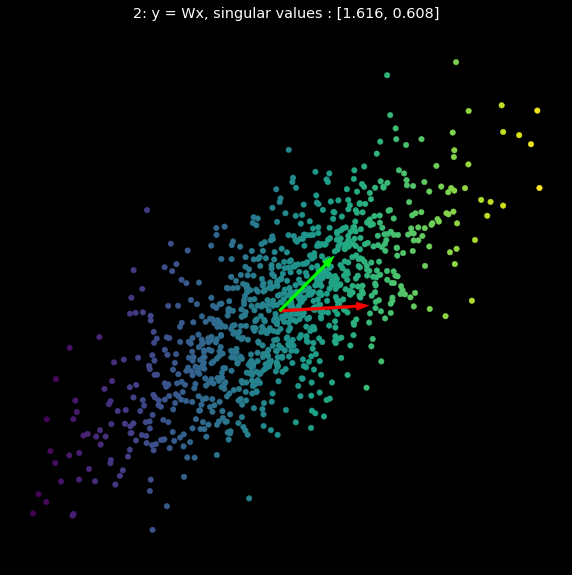

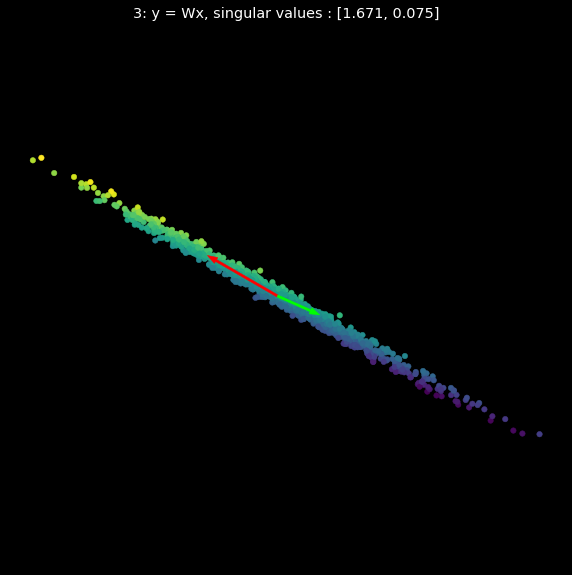

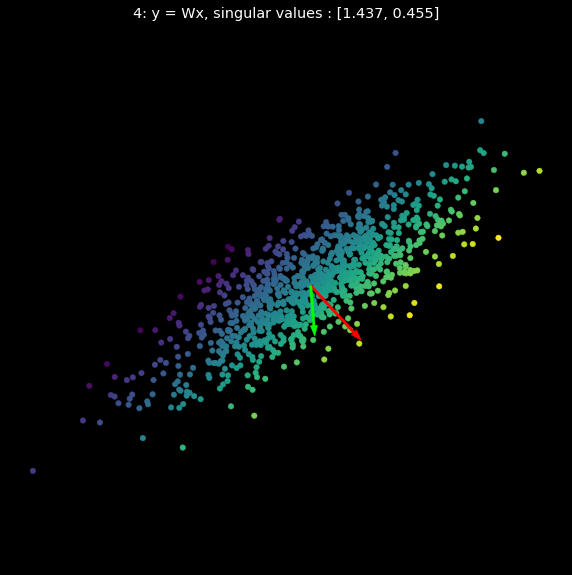

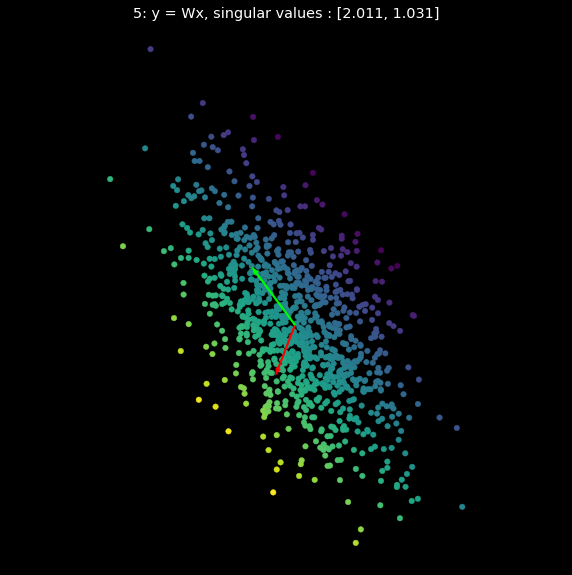

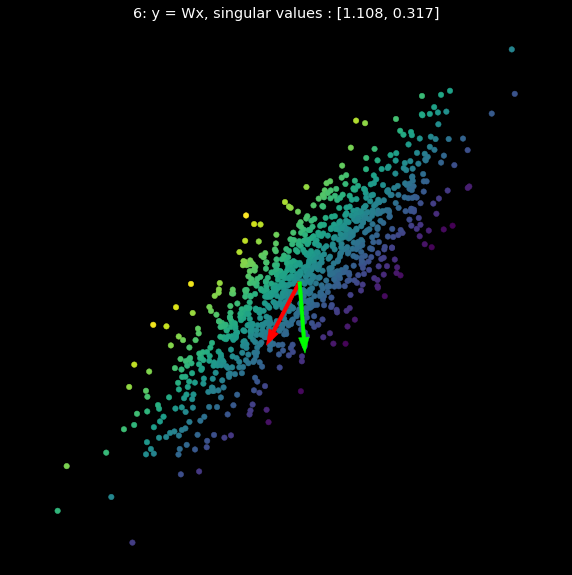

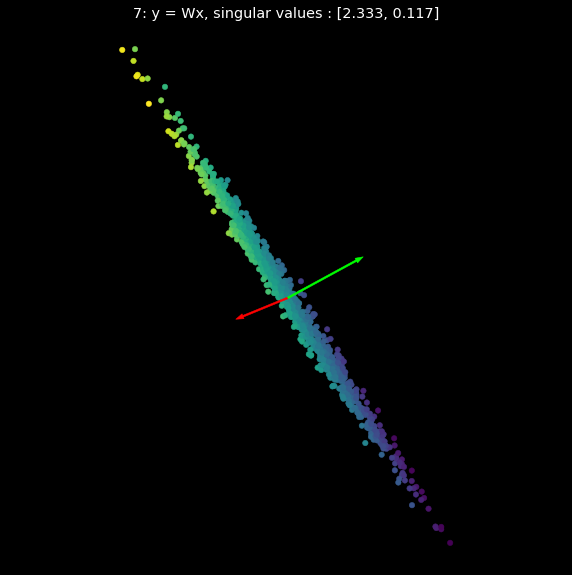

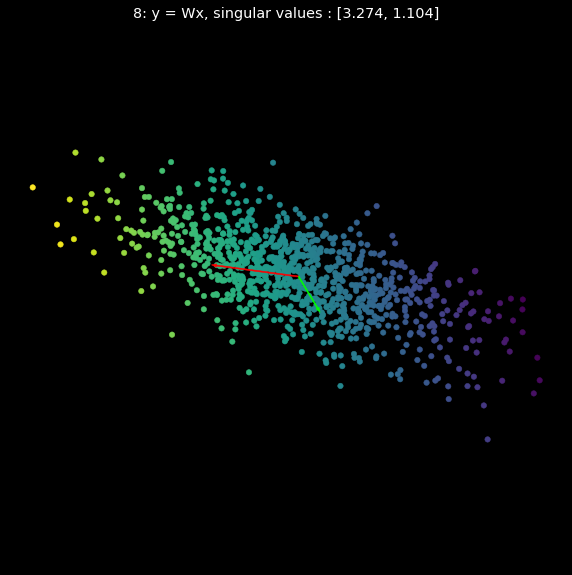

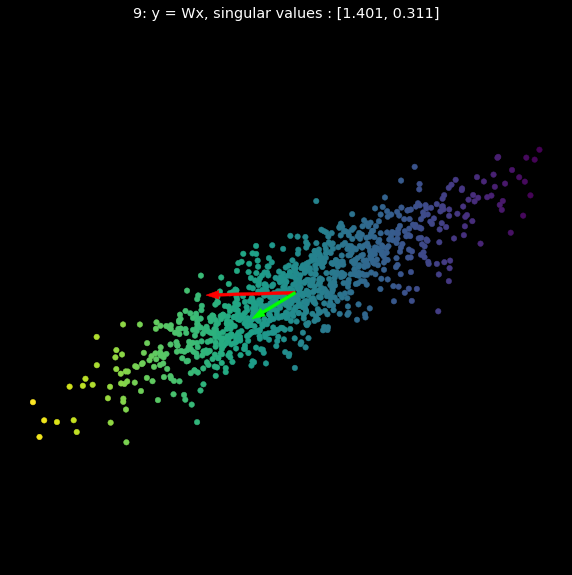

In [49]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)
#I guess we are trying to rewrite the matrix to be USV (or SVD that i usually call?)
for i in range(10):
    # create a random matrix
    W = torch.randn(2, 2).to(device)
    # transform points
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    show_scatterplot(Y, colors, title='{}: y = Wx, singular values : [{:.3f}, {:.3f}]'.format(i, S[0], S[1]))
    # transform the basis
    new_OI = OI @ W
    print(new_OI)
    # plot old and new basis
    # plot_bases(OI)
    plot_bases(new_OI)

# Linear transformation with PyTorch

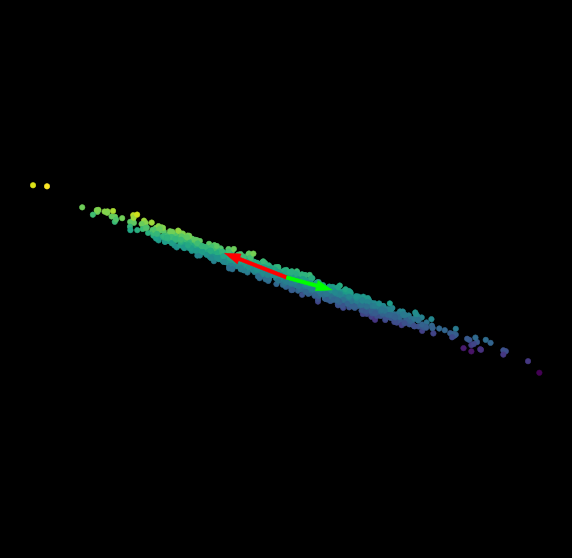

In [22]:
model = nn.Sequential(                    #now we are performing Linear Transformation here
        nn.Linear(2, 2, bias=False)
)
model.to(device)
with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors)
    plot_bases(model(OI))

# Non-linear Transform: Map Points to a Square

* Linear transforms can rotate, reflect, stretch and compress, but cannot curve
* We need non-linearities for this
* Can (approximately) map points to a square by first stretching out by a factor $s$, then squashing with a tanh function

$
   f(x)= \tanh \left(
  \left[ {\begin{array}{cc}
   s & 0 \\
   0 & s \\
  \end{array} } \right]  
  x
  \right)
$

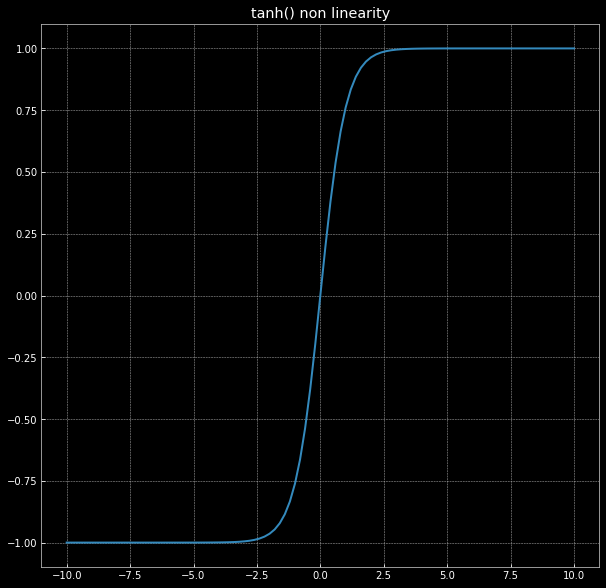

In [19]:
z = torch.linspace(-10, 10, 101)   #Here is the x-axis
s = torch.tanh(z)   #Here is the y-axis
plot(z.numpy(), s.numpy())
title('tanh() non linearity');

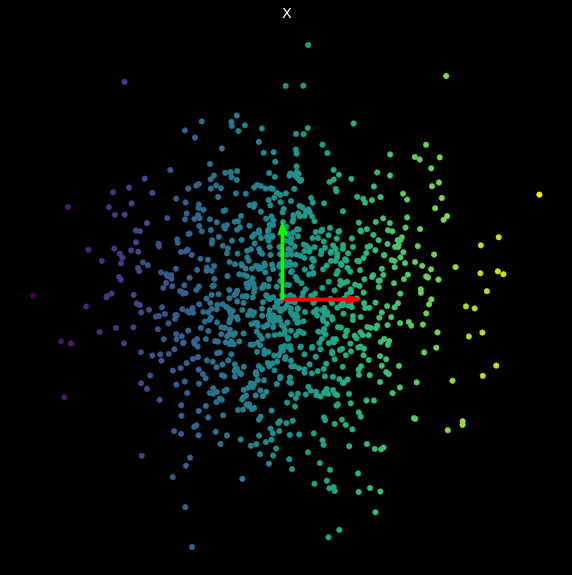

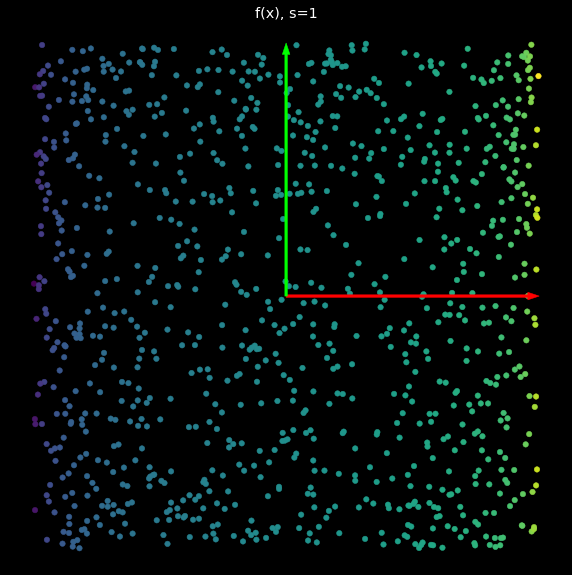

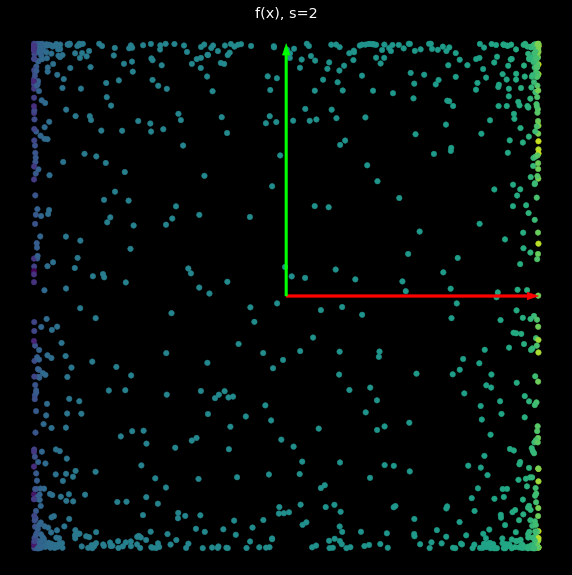

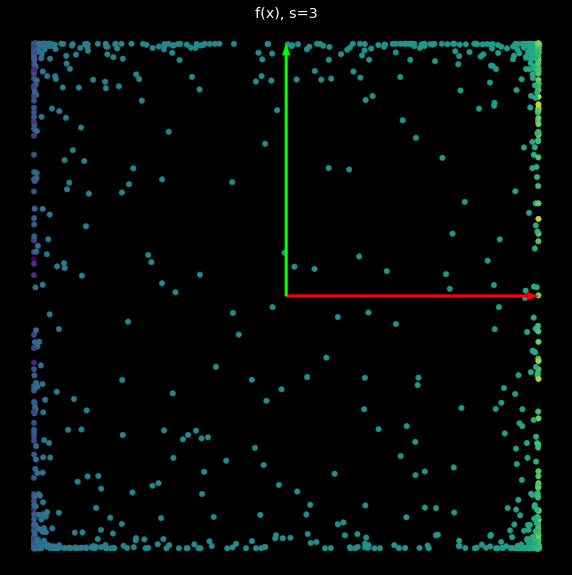

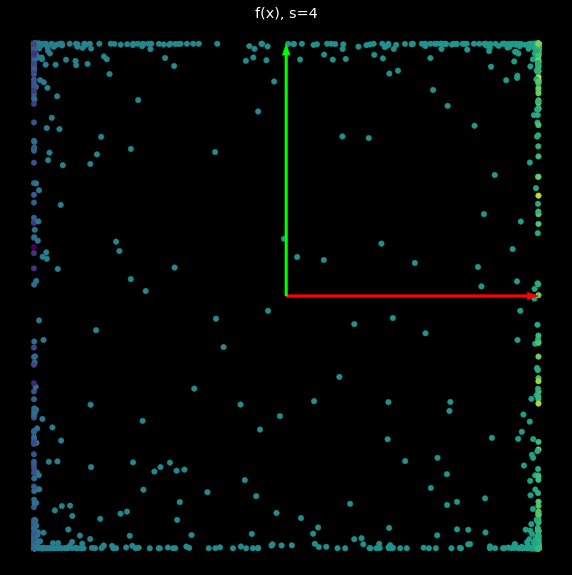

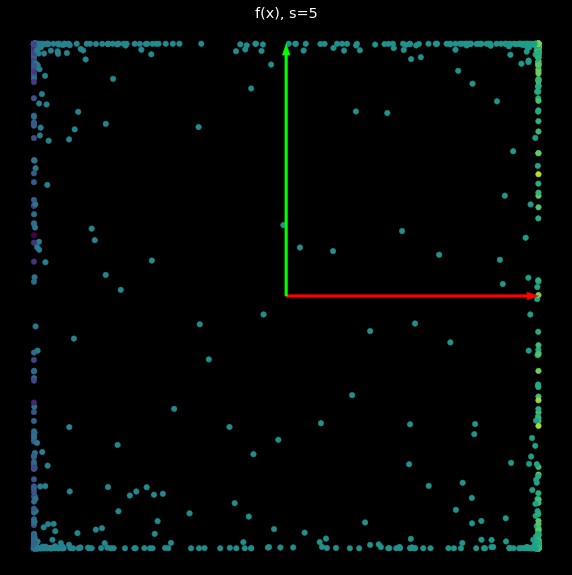

In [30]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh()
)

model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)       #multiply model w1 with scalar W
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

# Visualize Functions Represented by Random Neural Networks

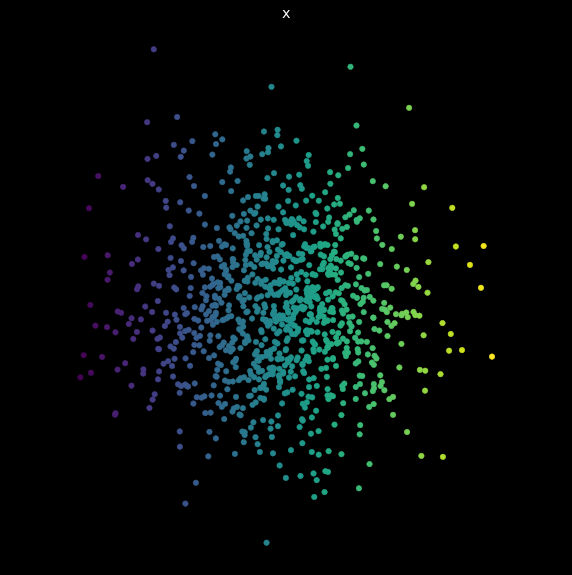

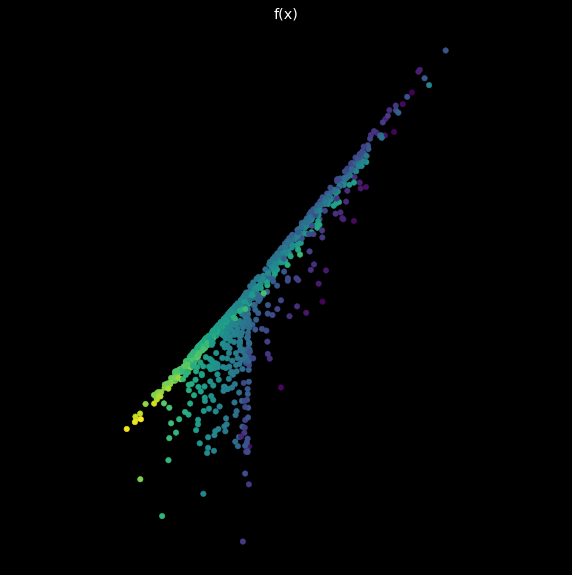

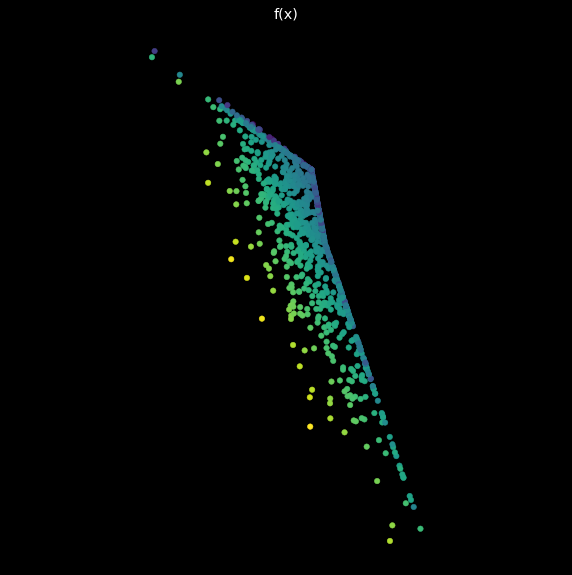

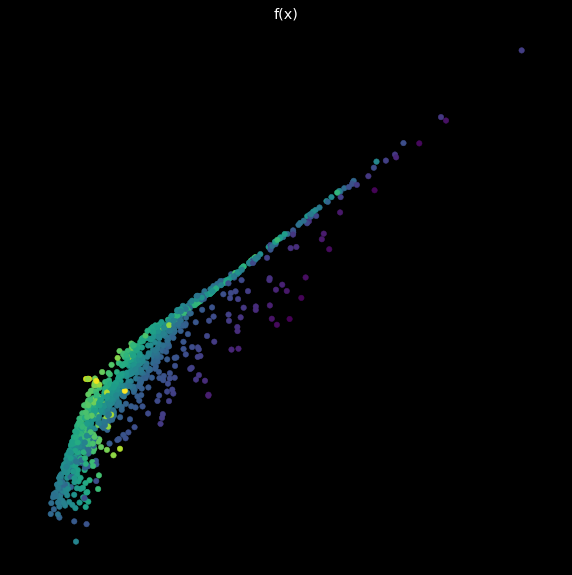

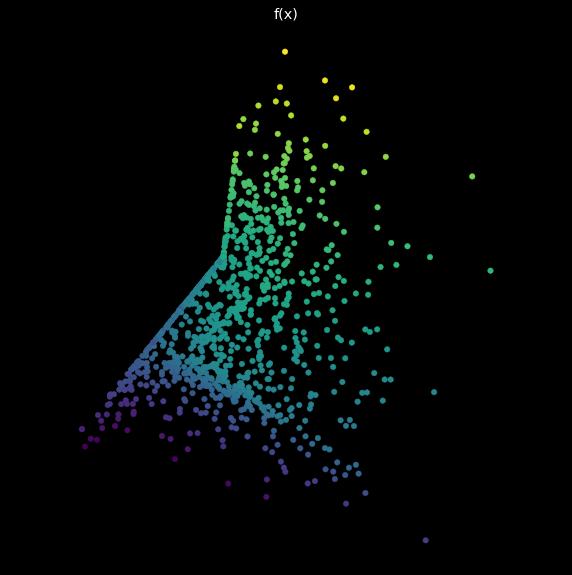

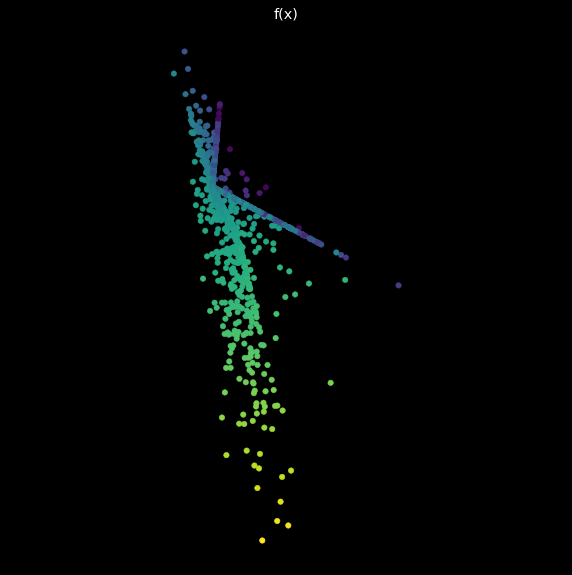

In [51]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

NL = nn.ReLU()
# NL = nn.Tanh()

for i in range(5):
    # create 1-layer neural networks with random weights
    model = nn.Sequential(
            nn.Linear(2, n_hidden), 
            NL, 
            nn.Linear(n_hidden, 2)
        )
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')
#     plot_bases(OI)

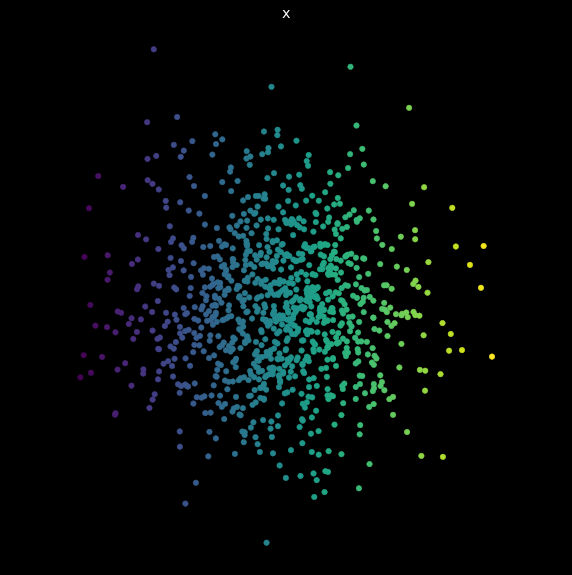

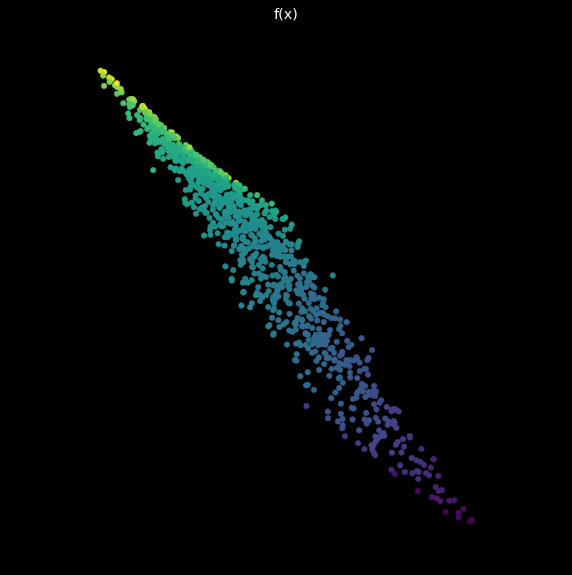

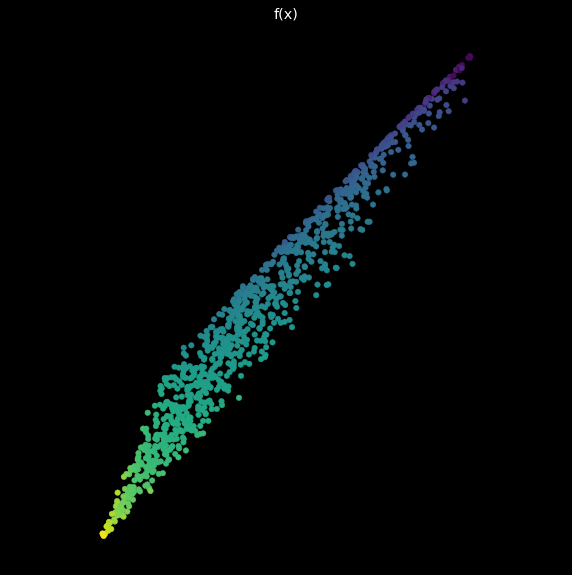

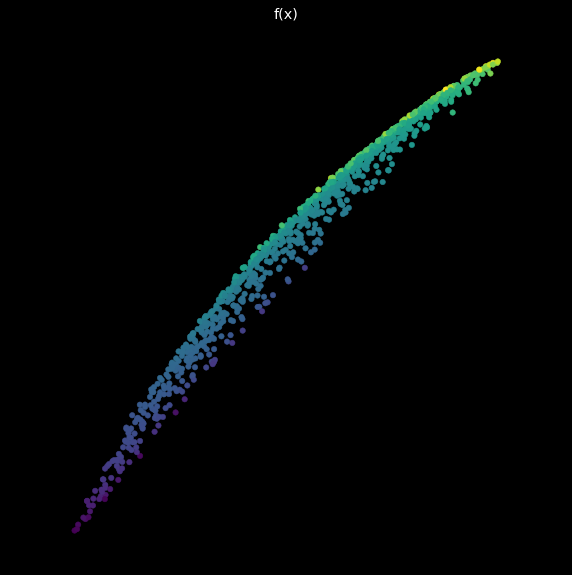

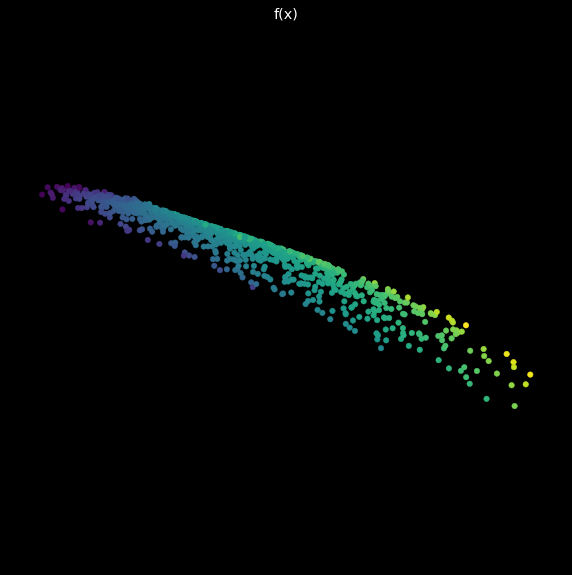

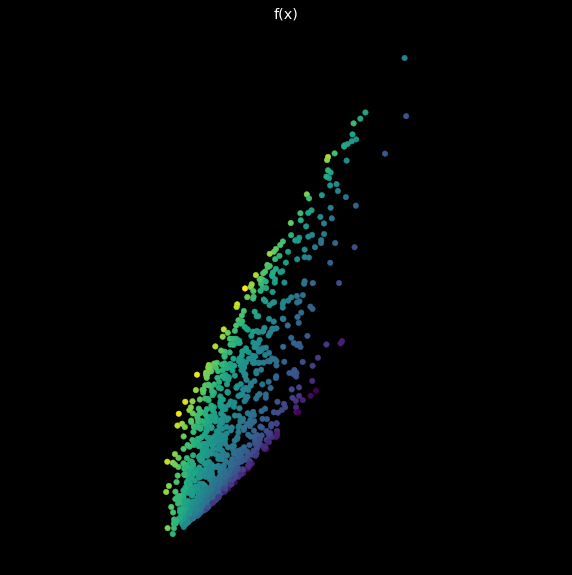

In [52]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, colors, title='f(x)')